In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Modules**

In [ ]:
!pip install imputena
from imputena import recommend_method, knn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=11a4bc682671a63ffd001273560a66d2b72c30e61740a5b38a5bece71f8debb6
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install dateutil
from dateutil.parser import parse

ERROR: Could not find a version that satisfies the requirement dateutil (from versions: none)
ERROR: No matching distribution found for dateutil


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import folium
import io
from PIL import Image
from dateutil.parser import parse
import json
import re
from itertools import chain
from datetime import datetime, timedelta
from collections import OrderedDict, defaultdict, Counter
from nltk.tokenize import TweetTokenizer

## **Traffic**

### Impute Missing Values

In [ ]:
traffic_df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/raw_traffic.csv').set_index('datetime')
traffic_df.head(5)

,01004,02384,02413,03022,100001,10011,19065,22001,22043,24014,...,74229,9658,9827,9834-PR,9836-PR,9849,F3FWY001,T0085,T0231,T0345
datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-07 00:00:00,880.0,590.0,140.0,286.0,NaN,1428.0,1544.0,2222.0,96.0,947.0,...,371.0,254.0,200.0,256.0,1058.0,272.0,688.0,36.0,400.0,164.0
2019-07-07 01:00:00,562.0,411.0,90.0,215.0,NaN,1054.0,1170.0,1438.0,54.0,614.0,...,174.0,158.0,135.0,194.0,751.0,173.0,347.0,18.0,297.0,89.0
2019-07-07 02:00:00,433.0,315.0,77.0,146.0,NaN,941.0,948.0,1020.0,31.0,495.0,...,124.0,95.0,100.0,95.0,633.0,97.0,265.0,12.0,255.0,48.0
2019-07-07 03:00:00,341.0,265.0,73.0,116.0,NaN,639.0,747.0,922.0,18.0,454.0,...,93.0,90.0,51.0,91.0,488.0,73.0,276.0,9.0,196.0,28.0
2019-07-07 04:00:00,296.0,206.0,100.0,100.0,NaN,335.0,623.0,710.0,16.0,400.0,...,94.0,96.0,32.0,54.0,394.0,73.0,446.0,8.0,170.0,33.0


In [ ]:
recommend_method(traffic_df)

'1. The data is a data frame.\n2. You want to apply the same method to the whole data frame.\n3. The data frame does not contain categorical data.\nTherefore you should apply imputation using k-NN.'

In [ ]:
imputed_df = knn(traffic_df, k = 3*30*24)

In [ ]:
for col in traffic_df.columns:
  data = traffic_df[col].copy()
  imputed_data = imputed_df[col]
  missing_pos = np.where(data.isnull())
  for i in missing_pos:
    data[i] = imputed_data[i]

  imputed_df[col] = data

Text(0.5, 1.0, 'imputed_data')

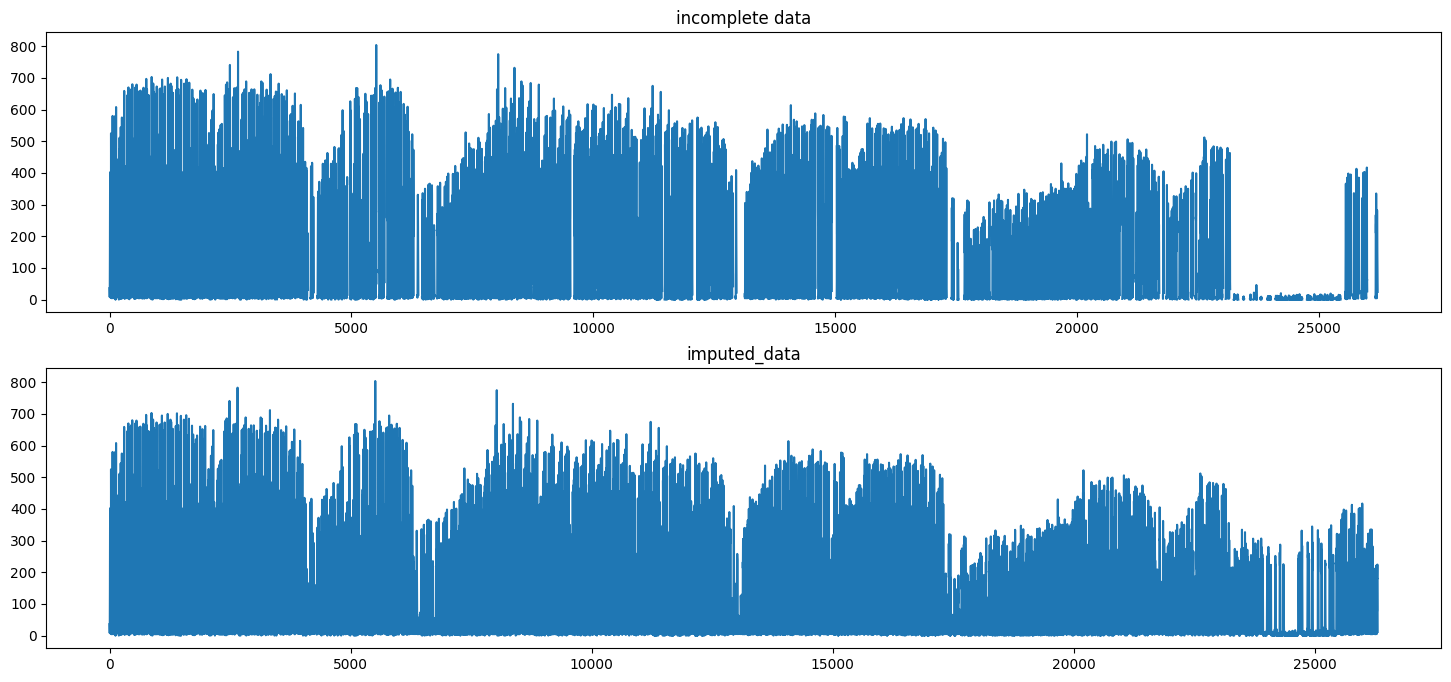

In [ ]:
station = 'T0085'
fig, axes = plt.subplots(2, 1, figsize = (18, 8))
axes[0].plot(traffic_df[station].values)
axes[0].set_title("incomplete data")
axes[1].plot(imputed_df[station].values)
axes[1].set_title("imputed_data")

Text(0.5, 1.0, 'imputed_data')

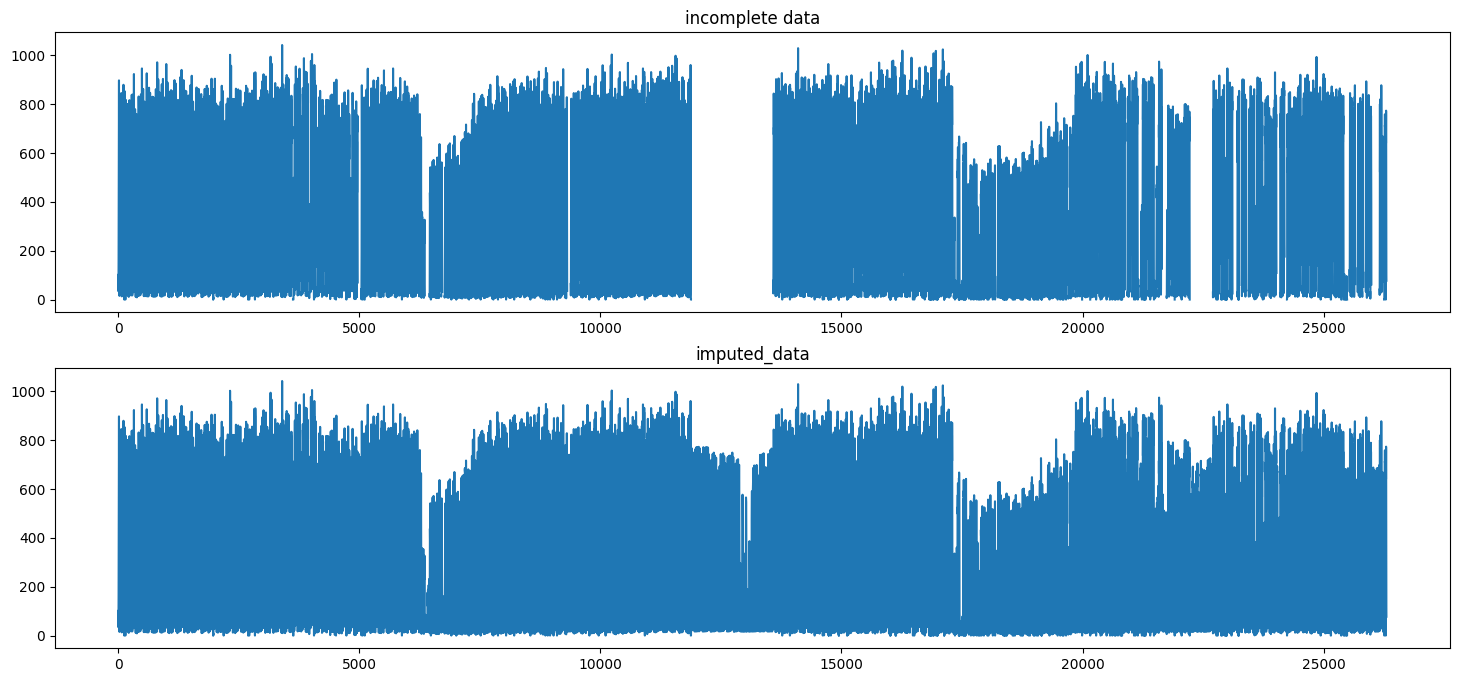

In [ ]:
station = '7126'
fig, axes = plt.subplots(2, 1, figsize = (18, 8))
axes[0].plot(traffic_df[station].values)
axes[0].set_title("incomplete data")
axes[1].plot(imputed_df[station].values)
axes[1].set_title("imputed_data")

Text(0.5, 1.0, 'imputed_data')

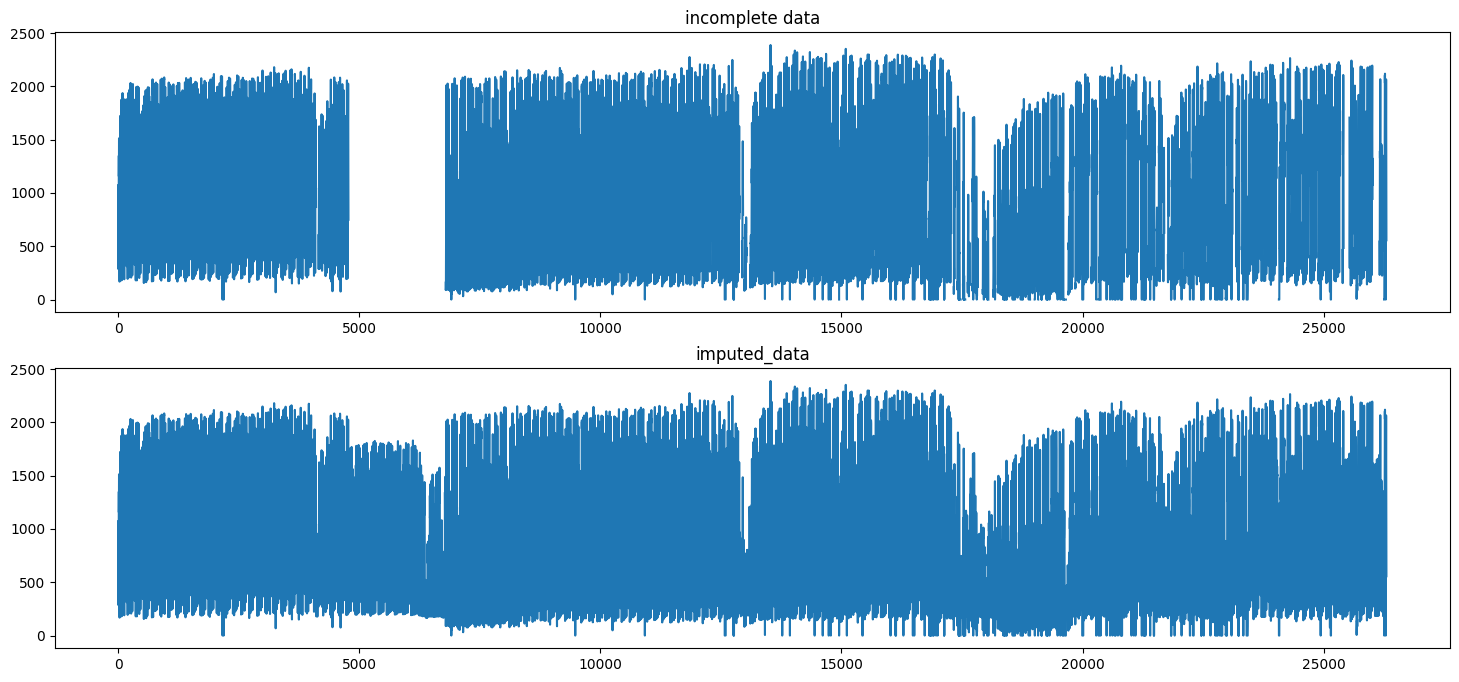

In [ ]:
station = '7251'
fig, axes = plt.subplots(2, 1, figsize = (18, 8))
axes[0].plot(traffic_df[station].values)
axes[0].set_title("incomplete data")
axes[1].plot(imputed_df[station].values)
axes[1].set_title("imputed_data")

Text(0.5, 1.0, 'imputed_data')

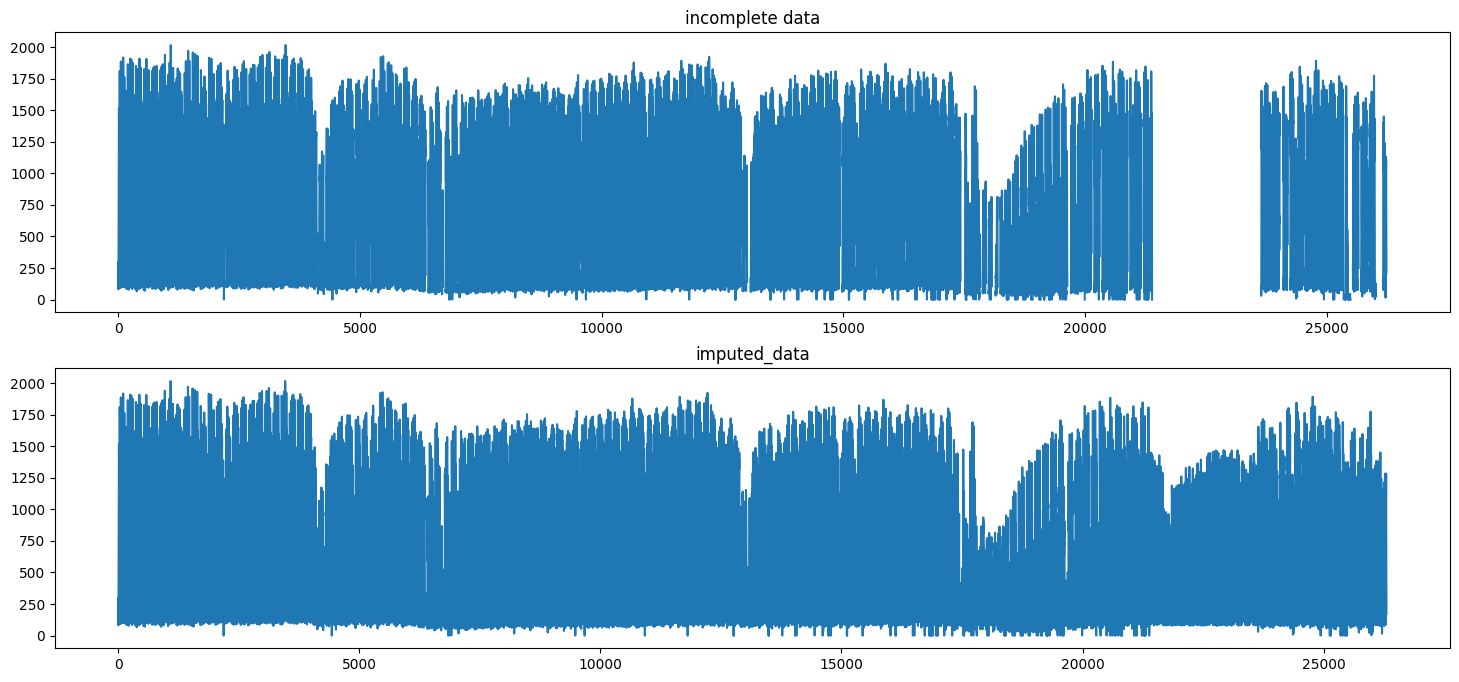

In [ ]:
station = '7112'
fig, axes = plt.subplots(2, 1, figsize = (18, 8))
axes[0].plot(traffic_df[station].values)
axes[0].set_title("incomplete data")
axes[1].plot(imputed_df[station].values)
axes[1].set_title("imputed_data")

Text(0.5, 1.0, 'imputed_data')

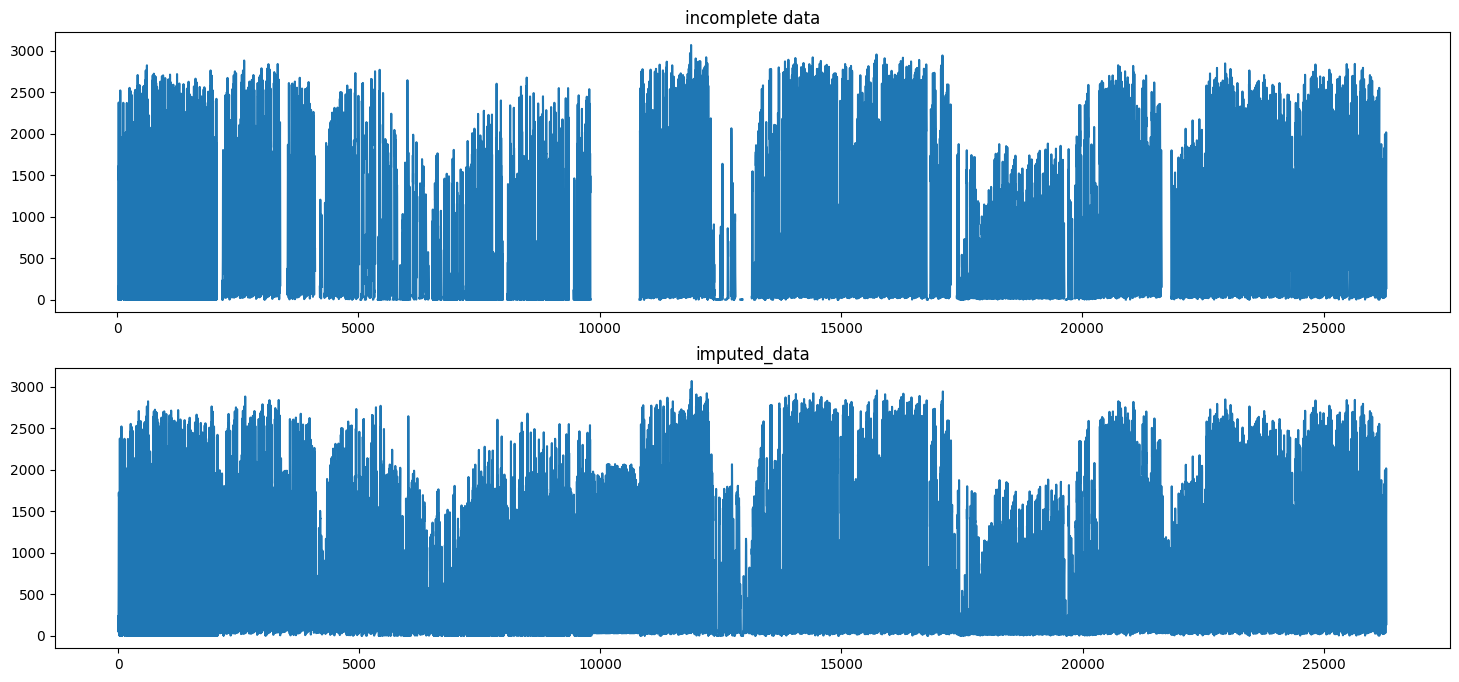

In [ ]:
station = '33023'
fig, axes = plt.subplots(2, 1, figsize = (18, 8))
axes[0].plot(traffic_df[station].values)
axes[0].set_title("incomplete data")
axes[1].plot(imputed_df[station].values)
axes[1].set_title("imputed_data")

In [ ]:
#imputed_df.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/traffic.csv')

### Visualize counter locations

In [ ]:
station_info = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/final_station_info.csv')

In [ ]:
m = folium.Map(location=[-33.88, 151.1], tiles="OpenStreetMap", zoom_start=10.5)
for i in range(0,len(station_info)):
   folium.CircleMarker(
      location=[station_info.iloc[i]['wgs84_latitude'], station_info.iloc[i]['wgs84_longitude']],
      popup=station_info.iloc[i]['station_id'],
      fillColor = 'red',
      stroke = False,
      fill = True,
      fillOpacity = 1,
      radius = 5,
   ).add_to(m)

m

In [ ]:
#m.save('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/counter_locations.html')

In [ ]:
avg_count = station_info[['station_id', 'wgs84_latitude', 'wgs84_longitude']]
count = []
for row in range(len(avg_count)):
  station_id = avg_count.iloc[row,:]['station_id']
  count.append(mean(list(imputed_df[station_id].values)))

avg_count['avg_traffic'] = count
avg_count

<ipython-input-23-c4e53af0df35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_count['avg_traffic'] = count


,station_id,wgs84_latitude,wgs84_longitude,avg_traffic
0,01004,-33.866180,151.203201,1446.475202
1,02384,-33.888908,151.200851,708.677842
2,02413,-33.873695,151.195328,334.377010
3,03022,-33.894791,151.220764,440.888160
4,100001,-33.878181,150.924942,1505.451546
...,...,...,...,...
60,9849,-33.877975,151.093185,630.681289
61,F3FWY001,-33.694206,151.121323,2778.993522
62,T0085,-33.665455,151.090271,164.589290
63,T0231,-33.838615,151.143753,768.103984


In [ ]:
m = folium.Map(location=[-33.88, 151.1], tiles="OpenStreetMap", zoom_start=10.5)
for i in range(0,len(avg_count)):
   folium.Circle(
      location=[avg_count.iloc[i]['wgs84_latitude'], avg_count.iloc[i]['wgs84_longitude']],
      popup=avg_count.iloc[i]['station_id'],
      radius=(avg_count.iloc[i]['avg_traffic'])*0.5,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map again
m

## **Weather**

In [ ]:
station_ids = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/traffic.csv').set_index('datetime').columns
drop_features = ['Unnamed: 0', 'rain', 'snowfall']

In [ ]:
for id in station_ids:
  df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/raw/{}.csv'.format(id)).set_index('datetime')
  new_df = df.drop(drop_features, axis = 1)
  new_df.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/{}.csv'.format(id))

In [ ]:
df_lst = []
for id in station_ids:
  df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/{}.csv'.format(id))
  df['station'] = [id]*len(df)
  df_lst.append(df)

weather = pd.concat(df_lst, axis = 0)
print(weather.shape)

(1709760, 29)


In [ ]:
weather = weather.groupby(['datetime'], group_keys=False).apply(lambda x: x).reset_index(drop = True)
weather

,datetime,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,weathercode,pressure_msl,surface_pressure,cloudcover,...,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,station
0,2019-07-07 00:00:00,16.4,80,12.8,16.5,0.0,2,1033.6,1033.0,51,...,14.4,15.9,14.1,15.4,18.8,0.226,0.217,0.158,0.122,01004
1,2019-07-07 00:00:00,16.2,80,12.7,16.3,0.0,2,1033.6,1030.1,51,...,14.4,15.8,14.0,15.3,18.6,0.226,0.217,0.158,0.122,02384
2,2019-07-07 00:00:00,16.2,80,12.7,16.3,0.0,2,1033.6,1030.4,51,...,14.4,15.8,14.0,15.3,18.6,0.226,0.217,0.158,0.122,02413
3,2019-07-07 00:00:00,16.1,79,12.6,16.2,0.0,2,1033.6,1028.2,51,...,14.4,15.7,13.9,15.2,18.5,0.226,0.217,0.158,0.122,03022
4,2019-07-07 00:00:00,15.5,78,11.6,15.2,0.0,2,1033.5,1031.5,67,...,13.0,14.5,12.5,13.8,18.0,0.230,0.189,0.150,0.135,100001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709755,2022-07-06 23:00:00,14.5,84,11.8,12.9,0.1,51,1011.2,1008.2,62,...,37.4,13.6,13.8,14.0,16.0,0.358,0.360,0.367,0.307,9849
1709756,2022-07-06 23:00:00,13.9,83,11.0,12.2,0.1,51,1011.3,997.1,57,...,34.2,13.0,13.2,13.8,16.0,0.424,0.425,0.428,0.410,F3FWY001
1709757,2022-07-06 23:00:00,13.5,83,10.6,12.4,0.0,3,1011.6,990.6,80,...,28.1,12.6,12.9,13.4,15.6,0.424,0.425,0.428,0.410,T0085
1709758,2022-07-06 23:00:00,14.5,84,11.7,13.0,0.1,51,1011.3,1008.5,57,...,34.2,13.7,13.9,14.3,16.4,0.392,0.393,0.401,0.375,T0231


In [ ]:
#weather.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/weather.csv', index = False)

## **Weather** (attributes.csv)

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709760 entries, 0 to 1709759
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   datetime                       object 
 1   temperature_2m                 float64
 2   relativehumidity_2m            int64  
 3   dewpoint_2m                    float64
 4   apparent_temperature           float64
 5   precipitation                  float64
 6   weathercode                    int64  
 7   pressure_msl                   float64
 8   surface_pressure               float64
 9   cloudcover                     int64  
 10  cloudcover_low                 int64  
 11  cloudcover_mid                 int64  
 12  cloudcover_high                int64  
 13  et0_fao_evapotranspiration     float64
 14  vapor_pressure_deficit         float64
 15  windspeed_10m                  float64
 16  windspeed_100m                 float64
 17  winddirection_10m              int64  
 18  wi

In [ ]:
attributes = weather.columns[1:-1]
attributes

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'apparent_temperature', 'precipitation', 'weathercode', 'pressure_msl',
       'surface_pressure', 'cloudcover', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'et0_fao_evapotranspiration',
       'vapor_pressure_deficit', 'windspeed_10m', 'windspeed_100m',
       'winddirection_10m', 'winddirection_100m', 'windgusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm'],
      dtype='object')

In [ ]:
df = weather[['datetime', 'station', 'temperature_2m']]
df = df.pivot(index="datetime", columns="station", values="temperature_2m")
df.columns.name = None
df

,01004,02384,02413,03022,100001,10011,19065,22001,22043,24014,...,74229,9658,9827,9834-PR,9836-PR,9849,F3FWY001,T0085,T0231,T0345
datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-07 00:00:00,16.4,16.2,16.2,16.1,15.5,16.3,16.3,15.8,15.9,15.8,...,15.3,15.3,16.4,15.8,15.6,16.0,15.1,14.7,15.9,14.6
2019-07-07 01:00:00,17.1,16.9,16.9,16.8,16.9,17.0,17.0,16.5,16.5,16.7,...,16.3,16.4,16.9,16.6,16.6,16.9,16.1,15.7,16.8,15.6
2019-07-07 02:00:00,17.4,17.3,17.3,17.2,17.3,17.4,17.3,16.8,16.9,17.2,...,16.8,17.0,17.2,16.9,17.1,17.4,16.7,16.3,17.3,16.2
2019-07-07 03:00:00,17.8,17.7,17.7,17.6,17.9,17.8,17.7,17.2,17.2,17.7,...,17.2,17.5,17.5,17.4,17.5,17.9,17.1,16.8,17.8,16.6
2019-07-07 04:00:00,18.0,17.8,17.8,17.7,18.1,17.9,17.9,17.3,17.4,17.8,...,17.4,17.7,17.7,17.6,17.7,18.0,17.3,16.9,17.9,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06 19:00:00,14.6,14.5,14.5,14.4,13.2,14.6,14.5,14.3,14.3,13.8,...,13.4,13.1,15.0,14.0,13.7,14.0,13.3,13.0,13.9,12.8
2022-07-06 20:00:00,14.6,14.4,14.4,14.3,13.3,14.5,14.5,14.2,14.3,13.7,...,13.3,13.1,14.9,14.0,13.6,13.9,13.3,12.9,13.9,12.8
2022-07-06 21:00:00,14.4,14.2,14.2,14.1,13.2,14.3,14.3,14.1,14.2,13.6,...,13.2,13.0,14.8,13.9,13.5,13.8,13.2,12.8,13.7,12.7


In [ ]:
for attr in attributes:
  df = weather[['datetime', 'station', '{}'.format(attr)]]
  df = df.pivot(index="datetime", columns="station", values=attr)
  df.columns.name = None
  df.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/weather/{}.csv'.format(attr), index = False)

In [ ]:
file = open('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/weather_attributes.txt','w')
for attr in attributes:
	file.write(attr+"\n")
file.close()

## **Traffic incidents**

### Read raw incidents

In [ ]:
with open('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/incidents/raw_incidents.txt') as f:
    data = f.read()
raw_incidents = json.loads(data)

In [ ]:
raw_incidents[0]

{'post_id': '601970962044663',
 'text': 'KATOOMBA - FINAL UPDATE AT 4:55PM: All lanes of the Great Western Highway have reopened after a police operation at Woodlands Road. No delays in the area.\n\n+++\n\nKATOOMBA - UPDATE AT 3:25PM: One lane of the Great Western Highway has reopened in each direction at Woodlands Road. Heavy traffic is easing through the area.\n\n+++\n\nKATOOMBA: Great Western Highway is closed in both directions due to a police operation at Woodlands Road.\n\nAvoid the area.\n\nAnyone already in the area should follow directions of emergency services and allow extra travel time.',
 'post_text': 'KATOOMBA - FINAL UPDATE AT 4:55PM: All lanes of the Great Western Highway have reopened after a police operation at Woodlands Road. No delays in the area.\n\n+++\n\nKATOOMBA - UPDATE AT 3:25PM: One lane of the Great Western Highway has reopened in each direction at Woodlands Road. Heavy traffic is easing through the area.\n\n+++\n\nKATOOMBA: Great Western Highway is closed i

In [ ]:
columns = ['post_id', 'text', 'time', 'likes', 'comments', 'shares', 'post_url']

In [ ]:
incidents_df = pd.DataFrame.from_dict(raw_incidents, orient='columns')[columns]
incidents_df['time'] = pd.to_datetime(incidents_df['time']).dt.strftime("%d-%m-%Y %H:%M:%S")
incidents_df

,post_id,text,time,likes,comments,shares,post_url
0,601970962044663,KATOOMBA - FINAL UPDATE AT 4:55PM: All lanes o...,13-07-2023 01:58:01,64,28,19,https://facebook.com/livetrafficnsw/posts/6019...
1,601958118712614,WINSTON HILLS - FINAL UPDATE AT 5PM: All north...,13-07-2023 01:17:26,38,19,8,https://facebook.com/livetrafficnsw/posts/6019...
2,601787755396317,KOOTINGAL - FINAL UPDATE AT 8:12AM: The New En...,12-07-2023 15:55:42,22,0,10,https://facebook.com/livetrafficnsw/posts/6017...
3,601531435421949,EASTWOOD - FINAL UPDATE at 8:50PM: First Avenu...,12-07-2023 04:03:42,40,2,7,https://facebook.com/livetrafficnsw/posts/6015...
4,601125812129178,STRATHFIELD - FINAL UPDATE AT 01:05AM: Liverpo...,11-07-2023 09:26:50,52,2,7,https://facebook.com/livetrafficnsw/posts/6011...
...,...,...,...,...,...,...,...
13955,649676045104106,CLYDE MOUNTAIN: One lane has reopened on the K...,30-04-2014 06:44:42,14,3,2,https://facebook.com/livetrafficnsw/posts/6496...
13956,649548241783553,CATCH PUBLIC TRANSPORT TO WINGS OVER ILLAWARRA...,30-04-2014 00:45:34,11,0,3,https://facebook.com/livetrafficnsw/posts/6495...
13957,649505381787839,CLYDE MOUNTAIN: The Kings Highway will be clos...,29-04-2014 22:15:27,10,0,3,https://facebook.com/livetrafficnsw/posts/6495...
13958,649475631790814,MOONEY MOONEY: All southbound lanes are now op...,29-04-2014 20:46:14,21,3,10,https://facebook.com/livetrafficnsw/posts/6494...


In [ ]:
x= incidents_df['text'][39]

In [ ]:
x

'LANE COVE - FINAL UPDATE AT 2:40PM: All citybound lanes on the M2 have reopened following a multi vehicle crash approaching the entrance to the Lane Cove Tunnel.\n\nContinue to allow extra travel time as heavy traffic returns to normal.\n\n+++\n\nLANE COVE - UPDATE AT 10:46AM: Citybound traffic on the M2 now being diverted off the motorway at Delhi Road as the recovery and clean-up of this crash continues.\nAllow plenty of extra travel time.\n\n+++\n\nLANE COVE: All citybound lanes of the M2 are closed due to a multiple vehicle crash approaching the entrance to the Lane Cove Tunnel.\n\nEastbound traffic from the M2 can travel along Epping Road instead through to the Pacific Highway\n\nTraffic is heavy through the area so allow plenty of extra travel time.'

### Load Station Info

In [ ]:
station_info = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/final_station_info.csv')

In [ ]:
suburb_list = list(set(station_info['suburb']))
road_name = list(set(station_info['road_name']))
intersaction = list(set(station_info['intersection']))

### Filter incidents by Datetime (7/7/2019 - 6/7/2022)

In [ ]:
start_date = '2019-07-07'
end_date = '2022-07-06'

In [ ]:
incidents_df['date'] = pd.to_datetime(incidents_df['time']).dt.strftime('%Y-%m-%d')
incidents_by_date = incidents_df[incidents_df['date'].isin(pd.date_range(start_date,end_date).strftime("%Y-%d-%m"))]
incidents_df = incidents_df.drop(['date'], axis =1)
incidents_by_date = incidents_by_date.drop(['date'], axis =1).reset_index(drop=True)
incidents_by_date

,post_id,text,time,likes,comments,shares,post_url
0,364669825774779,ROADS AFFECTED BY FLOODING - UPDATE ON THURSDA...,06-07-2022 20:28:02,289,118,85,https://facebook.com/livetrafficnsw/posts/3646...
1,364598869115208,HALFWAY CREEK: FINAL UPDATE AT 5:00PM: All lan...,06-07-2022 17:38:37,941,289,283,https://facebook.com/livetrafficnsw/posts/3645...
2,364508015790960,BEAUMONT - FINAL UPDATE 4:10AM:\nMoss Vale Roa...,06-07-2022 14:31:46,55,0,8,https://facebook.com/livetrafficnsw/posts/3645...
3,364379409137154,SANDY HOLLOW - FINAL UPDATE: Golden Highway ha...,06-07-2022 10:17:53,161,25,38,https://facebook.com/livetrafficnsw/posts/3643...
4,364070192501409,ROADS AFFECTED BY FLOODING - UPDATE ON WEDNESD...,05-07-2022 21:06:12,316,113,76,https://facebook.com/livetrafficnsw/posts/3640...
...,...,...,...,...,...,...,...
841,2787814277956928,Wilfred Barrett Drive (the Central Coast Highw...,08-07-2019 00:13:12,31,16,21,https://facebook.com/livetrafficnsw/posts/2787...
842,2787511634653859,WAHROONGA: All southbound lanes have reopened ...,07-07-2019 21:03:16,73,47,12,https://facebook.com/livetrafficnsw/posts/2787...
843,2787422391329450,WAHROONGA: There are significant delays southb...,07-07-2019 20:12:12,40,98,33,https://facebook.com/livetrafficnsw/posts/2787...
844,2787349891336700,ERMINGTON: All westbound lanes are closed agai...,07-07-2019 19:32:07,7,3,1,https://facebook.com/livetrafficnsw/posts/2787...


### Filter by Suburb List

In [ ]:
incidents_by_suburb = []
for i in range(len(incidents_by_date)):
  text = incidents_by_date['text'][i]
  if any(ele in text for ele in suburb_list) == True:
    incidents_by_suburb.append(incidents_by_date.loc[i])
print(f"Total related incidents: {len(incidents_by_suburb)}.")
incidents_by_suburb = pd.DataFrame(incidents_by_suburb)
incidents_by_suburb

Total related news: 135.


,post_id,text,time,likes,comments,shares,post_url
0,364669825774779,ROADS AFFECTED BY FLOODING - UPDATE ON THURSDA...,06-07-2022 20:28:02,289,118,85,https://facebook.com/livetrafficnsw/posts/3646...
4,364070192501409,ROADS AFFECTED BY FLOODING - UPDATE ON WEDNESD...,05-07-2022 21:06:12,316,113,76,https://facebook.com/livetrafficnsw/posts/3640...
5,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,520,69,171,https://facebook.com/livetrafficnsw/posts/3636...
6,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,04-07-2022 20:13:46,409,90,134,https://facebook.com/livetrafficnsw/posts/3634...
7,362815415960220,LATEST ON FLOOD AFFECTED ROADS ON MONDAY 4 JUL...,03-07-2022 20:32:15,272,42,80,https://facebook.com/livetrafficnsw/posts/3628...
...,...,...,...,...,...,...,...
804,2877233789014976,#CITY2SURF UPDATE: Roads are closed around the...,10-08-2019 20:44:30,62,29,7,https://facebook.com/livetrafficnsw/posts/2877...
815,2868017203269968,This crash site has now been cleared and all l...,07-08-2019 07:22:12,12,2,0,https://facebook.com/livetrafficnsw/posts/2868...
816,2867997343271954,CARLINGFORD: There's very heavy traffic on Pen...,07-08-2019 07:08:50,17,8,3,https://facebook.com/livetrafficnsw/posts/2867...
822,2862983310440024,CITY2SURF - SUN 11 AUGUST: Major roads from th...,05-08-2019 07:47:06,4600,252,461,https://facebook.com/livetrafficnsw/posts/2862...


### Filter by Road name

In [ ]:
incidents_by_road = []
for i in range(len(incidents_by_date)):
  text = incidents_by_date['text'][i]
  if any(ele in text for ele in road_name) == True:
    incidents_by_road.append(incidents_by_date.loc[i])
print(f"Total related incidents: {len(incidents_by_road)}.")
incidents_by_road = pd.DataFrame(incidents_by_road)
incidents_by_road

Total related news: 427.


,post_id,text,time,likes,comments,shares,post_url
1,364598869115208,HALFWAY CREEK: FINAL UPDATE AT 5:00PM: All lan...,06-07-2022 17:38:37,941,289,283,https://facebook.com/livetrafficnsw/posts/3645...
5,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,520,69,171,https://facebook.com/livetrafficnsw/posts/3636...
6,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,04-07-2022 20:13:46,409,90,134,https://facebook.com/livetrafficnsw/posts/3634...
7,362815415960220,LATEST ON FLOOD AFFECTED ROADS ON MONDAY 4 JUL...,03-07-2022 20:32:15,272,42,80,https://facebook.com/livetrafficnsw/posts/3628...
8,362252232683205,LATEST ON FLOOD AFFECTED ROADS IN SYDNEY AS OF...,02-07-2022 23:54:57,608,70,107,https://facebook.com/livetrafficnsw/posts/3622...
...,...,...,...,...,...,...,...
841,2787814277956928,Wilfred Barrett Drive (the Central Coast Highw...,08-07-2019 00:13:12,31,16,21,https://facebook.com/livetrafficnsw/posts/2787...
842,2787511634653859,WAHROONGA: All southbound lanes have reopened ...,07-07-2019 21:03:16,73,47,12,https://facebook.com/livetrafficnsw/posts/2787...
843,2787422391329450,WAHROONGA: There are significant delays southb...,07-07-2019 20:12:12,40,98,33,https://facebook.com/livetrafficnsw/posts/2787...
844,2787349891336700,ERMINGTON: All westbound lanes are closed agai...,07-07-2019 19:32:07,7,3,1,https://facebook.com/livetrafficnsw/posts/2787...


### Filter by Intersection

In [ ]:
incidents_by_intersection = []
for i in range(len(incidents_by_date)):
  text = incidents_by_date['text'][i]
  if any(ele in text for ele in intersaction) == True:
    incidents_by_intersection.append(incidents_by_date.loc[i])
print(f"Total related incidents: {len(incidents_by_intersection)}.")
incidents_by_intersection = pd.DataFrame(incidents_by_intersection)
incidents_by_intersection

Total related news: 106.


,post_id,text,time,likes,comments,shares,post_url
5,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,520,69,171,https://facebook.com/livetrafficnsw/posts/3636...
7,362815415960220,LATEST ON FLOOD AFFECTED ROADS ON MONDAY 4 JUL...,03-07-2022 20:32:15,272,42,80,https://facebook.com/livetrafficnsw/posts/3628...
9,361967616045000,GEORGES HALL - UPDATE 3:45AM: Henry Lawson Dri...,02-07-2022 14:03:54,246,25,32,https://facebook.com/livetrafficnsw/posts/3619...
10,361934472714981,MILPERRA - UPDATE AT 11:50PM: Due to further f...,02-07-2022 12:58:11,230,29,32,https://facebook.com/livetrafficnsw/posts/3619...
19,346529477588814,MARRANGAROO (WEST OF LITHGOW) - FINAL UPDATE A...,09-06-2022 02:09:43,155,4,11,https://facebook.com/livetrafficnsw/posts/3465...
...,...,...,...,...,...,...,...
802,2877436765661345,RAGLAN TO MARRANGAROO: The Great Western Highw...,10-08-2019 22:49:44,351,193,237,https://facebook.com/livetrafficnsw/posts/2877...
805,2874808195924202,GREAT WESTERN HIGHWAY - BLUE MOUNTAINS:\n\nThe...,09-08-2019 22:07:37,165,186,65,https://facebook.com/livetrafficnsw/posts/2874...
806,2873101716094850,MOORE PARK: The Eastern Distributor is closed ...,09-08-2019 06:58:40,13,3,7,https://facebook.com/livetrafficnsw/posts/2873...
834,2796374507100905,Update: All lanes of the Great Western Highway...,11-07-2019 08:48:08,16,0,1,https://facebook.com/livetrafficnsw/posts/2796...


### Combine related incidents (suburb, road_name, intersection)

In [ ]:
total_incidents_df = pd.concat([incidents_by_suburb, incidents_by_road,incidents_by_intersection])
total_incidents_df.drop_duplicates(subset=['post_id'], keep='first', inplace=True, ignore_index=True)

In [ ]:
total_incidents_df

,post_id,text,time,likes,comments,shares,post_url
0,364669825774779,ROADS AFFECTED BY FLOODING - UPDATE ON THURSDA...,06-07-2022 20:28:02,289,118,85,https://facebook.com/livetrafficnsw/posts/3646...
1,364070192501409,ROADS AFFECTED BY FLOODING - UPDATE ON WEDNESD...,05-07-2022 21:06:12,316,113,76,https://facebook.com/livetrafficnsw/posts/3640...
2,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,520,69,171,https://facebook.com/livetrafficnsw/posts/3636...
3,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,04-07-2022 20:13:46,409,90,134,https://facebook.com/livetrafficnsw/posts/3634...
4,362815415960220,LATEST ON FLOOD AFFECTED ROADS ON MONDAY 4 JUL...,03-07-2022 20:32:15,272,42,80,https://facebook.com/livetrafficnsw/posts/3628...
...,...,...,...,...,...,...,...
474,5268775016527496,HAMMONDVILLE - FINAL UPDATE 7:10AM: All eastbo...,12-04-2021 20:34:43,32,14,5,https://facebook.com/livetrafficnsw/posts/5268...
475,4813260578745611,RANDWICK - FINAL UPDATE AT 6:55PM: All eastbou...,05-01-2021 06:41:18,22,0,4,https://facebook.com/livetrafficnsw/posts/4813...
476,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,12-10-2020 08:29:36,11,2,4,https://facebook.com/livetrafficnsw/posts/4453...
477,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,11-08-2020 15:23:45,25,2,2,https://facebook.com/livetrafficnsw/posts/4136...


In [ ]:
#total_incidents_df.to_csv("/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/incidents/Total_related_incidents.csv")

### Extract location info from incidents

In [ ]:
emoji_list = list(UNICODE_EMOJI)

In [ ]:
def split_emoji_text(text):
    result = ''.join((' {} '.format(el) if el in emoji_list else el for el in text))
    return result

In [ ]:
def regex_or(*items):
    return '(?:' + '|'.join(items) + ')'

In [ ]:
delimeter1 = r"[\*]{3,}"
delimeter2 = r"[\+]+"
delimeter3 = r"Live Traffic NSW"
delimeter4 = r"NSW"
regex = regex_or(delimeter1, delimeter2, delimeter3, delimeter4)

In [ ]:
regex_suburb = r"\b(?:{})".format("|".join(suburb_list))
regex_road = r"\b(?:{})".format("|".join(road_name))
regex_intersection = r"\b(?:{})".format("|".join(intersaction))
regex_date = r"\b([A-Za-z]{0,}[\.\,\s]{0,}[A-Za-z]{1,}[\.\s]{1,}[0-9]{1,2}[\,\s]{0,}[0-9]{4})\b"
regex_time = r"((1[0-2]|0?[1-9]):([0-5][0-9])((\\s| )?[AaPp][Mm]))"

In [ ]:
list_symbol = ['+', '*']
delimeters = r"[\{}]+".format("|".join(list_symbol))
delimeters

'[\\+|*]+'

In [ ]:
def return_value(list):
  if (len(list)==0):
    return np.nan
  return list
def return_date(date):
  return parse(str(date), fuzzy=True).strftime("%d-%m-%Y")
def return_time(time):
  return parse(str(time), fuzzy=True).strftime("%H:%M:%S")

In [ ]:
import datetime

def round_time(dt=None, date_delta=datetime.timedelta(minutes=1), to='average'):
    """
    Round a datetime object to a multiple of a timedelta
    dt : datetime.datetime object, default now.
    dateDelta : timedelta object, we round to a multiple of this, default 1 minute.
    from:  http://stackoverflow.com/questions/3463930/how-to-round-the-minute-of-a-datetime-object-python
    """
    round_to = date_delta.total_seconds()
    if dt is None:
        dt = datetime.now()
    seconds = (dt - dt.min).seconds

    if seconds % round_to == 0 and dt.microsecond == 0:
        rounding = (seconds + round_to / 2) // round_to * round_to
    else:
        if to == 'up':
            # // is a floor division, not a comment on following line (like in javascript):
            rounding = (seconds + dt.microsecond/1000000 + round_to) // round_to * round_to
        elif to == 'down':
            rounding = seconds // round_to * round_to
        else:
            rounding = (seconds + round_to / 2) // round_to * round_to

    return dt + datetime.timedelta(0, rounding - seconds, - dt.microsecond)

In [ ]:
event_df = pd.DataFrame(columns = ['post_id', 'text', 'posted_time', 'event_date', 'event_time', 'event_datetime','polarity','suburb', 'road_name', 'intersection','count_suburb', 'count_road_name', 'count_intersection', 'related_station'])
for i in range(len(total_incidents_df)):
  id = total_incidents_df['post_id'][i]
  posted_time = total_incidents_df['time'][i]
  text = total_incidents_df['text'][i]
  text = split_emoji_text(text)
  text_split_by_update = re.split(regex, text)
  for j in range(len(text_split_by_update)):
    event = text_split_by_update[j]
    new_row = pd.DataFrame({'post_id': id, 'text':event, 'posted_time': posted_time, 'polarity': 0} , index=[0])
    event_df = pd.concat([new_row, event_df.loc[:]]).reset_index(drop=True)

In [ ]:
event_df

,post_id,text,posted_time,polarity,event_date,event_time,event_datetime,suburb,road_name,intersection,count_suburb,count_road_name,count_intersection,related_station
0,2943439475727740,"CARINGBAH.\nDue to emergency roadwork, a contr...",04-09-2019 17:50:01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,11-08-2020 15:23:45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4453749754696697,\n\nKENSINGTON: All southbound lanes are close...,12-10-2020 08:29:36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,12-10-2020 08:29:36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4813260578745611,\n\nRANDWICK: All eastbound lanes of Alison Ro...,05-01-2021 06:41:18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,364070192501409,\n\nROADS AFFECTED BY FLOODING - UPDATE ON WED...,05-07-2022 21:06:12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872,364070192501409,ROADS AFFECTED BY FLOODING - UPDATE ON WEDNESD...,05-07-2022 21:06:12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,364669825774779,\n\nROADS AFFECTED BY…,06-07-2022 20:28:02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,364669825774779,\n\nROADS AFFECTED BY FLOODING - UPDATE ON THU...,06-07-2022 20:28:02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(len(event_df)):
    text = event_df['text'][i]
    posted_time = event_df['posted_time'][i]
    date = re.findall(regex_date, text)
    time = re.findall(regex_time, text)

    if (len(time) != 0):
      event_df['event_time'][i] = return_time(time[0][0])
    else:
      event_df['event_time'][i] = return_time(posted_time)

    if (len(date) != 0):
      event_df['event_date'][i] = return_date(date)
    else:
      event_df['event_date'][i] = return_date(posted_time)

    event_df['event_datetime'][i] = event_df['event_date'][i] + ' ' + event_df['event_time'][i]
    event_df['event_datetime'][i] = pd.to_datetime(event_df['event_datetime'][i], format='%d-%m-%Y %H:%M:%S')
    event_df['event_datetime'][i] = round_time(pd.Timestamp.to_pydatetime(event_df['event_datetime'][i]), date_delta=datetime.timedelta(minutes=60), to='up')
    event_df['event_datetime'][i] = event_df['event_datetime'][i].strftime('%m-%d-%Y %H:%M:%S')

In [ ]:
event_df

,post_id,text,posted_time,polarity,event_date,event_time,event_datetime,suburb,road_name,intersection,count_suburb,count_road_name,count_intersection,related_station
0,2943439475727740,"CARINGBAH.\nDue to emergency roadwork, a contr...",04-09-2019 17:50:01,0,09-04-2019,17:50:01,04-09-2019 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,11-08-2020 15:23:45,0,08-11-2020,15:23:45,11-08-2020 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4453749754696697,\n\nKENSINGTON: All southbound lanes are close...,12-10-2020 08:29:36,0,10-12-2020,08:29:36,12-10-2020 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,12-10-2020 08:29:36,0,10-12-2020,02:30:00,12-10-2020 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4813260578745611,\n\nRANDWICK: All eastbound lanes of Alison Ro...,05-01-2021 06:41:18,0,01-05-2021,06:41:18,05-01-2021 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,364070192501409,\n\nROADS AFFECTED BY FLOODING - UPDATE ON WED...,05-07-2022 21:06:12,0,07-05-2022,19:00:00,05-07-2022 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872,364070192501409,ROADS AFFECTED BY FLOODING - UPDATE ON WEDNESD...,05-07-2022 21:06:12,0,07-05-2022,20:30:00,05-07-2022 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,364669825774779,\n\nROADS AFFECTED BY…,06-07-2022 20:28:02,0,07-06-2022,20:28:02,06-07-2022 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,364669825774779,\n\nROADS AFFECTED BY FLOODING - UPDATE ON THU...,06-07-2022 20:28:02,0,07-06-2022,10:00:00,06-07-2022 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(len(event_df)):
    text = event_df['text'][i]
    suburb = list(set(re.findall(regex_suburb, text)))
    event_df['count_suburb'][i] = len(suburb)
    event_df['suburb'][i] = return_value(suburb)
    road = list(set(re.findall(regex_road, text)))
    event_df['count_road_name'][i] = len(road)
    event_df['road_name'][i] = return_value(road)
    intersection = list(set(re.findall(regex_intersection, text)))
    event_df['count_intersection'][i] = len(intersection)
    event_df['intersection'][i] = return_value(intersection)

In [ ]:
event_df = event_df.dropna(subset=['suburb','road_name', 'intersection'], thresh=1).reset_index(drop=True)
event_df

,post_id,text,posted_time,polarity,event_date,event_time,event_datetime,suburb,road_name,intersection,count_suburb,count_road_name,count_intersection,related_station
0,2943439475727740,"CARINGBAH.\nDue to emergency roadwork, a contr...",04-09-2019 17:50:01,0,09-04-2019,17:50:01,04-09-2019 18:00:00,NaN,NaN,[Port Hacking Road],0,0,1,NaN
1,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,11-08-2020 15:23:45,0,08-11-2020,15:23:45,11-08-2020 16:00:00,NaN,NaN,[The Seven Ways],0,0,1,NaN
2,4453749754696697,\n\nKENSINGTON: All southbound lanes are close...,12-10-2020 08:29:36,0,10-12-2020,08:29:36,12-10-2020 09:00:00,NaN,NaN,[Anzac Parade],0,0,1,NaN
3,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,12-10-2020 08:29:36,0,10-12-2020,02:30:00,12-10-2020 03:00:00,NaN,NaN,[Anzac Parade],0,0,1,NaN
4,4813260578745611,\n\nRANDWICK: All eastbound lanes of Alison Ro...,05-01-2021 06:41:18,0,01-05-2021,06:41:18,05-01-2021 07:00:00,NaN,NaN,[Anzac Parade],0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,04-07-2022 20:13:46,0,07-04-2022,20:13:46,04-07-2022 21:00:00,[Narrabeen],[Pacific Highway],NaN,1,1,0,NaN
653,363611919213903,\n\nROADS AFFECTED BY FLOODING - UPDATE ON TUE...,05-07-2022 04:36:59,0,07-05-2022,18:30:00,05-07-2022 19:00:00,[Milperra],NaN,[Henry Lawson Drive],1,0,1,NaN
654,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,0,07-05-2022,23:45:00,05-08-2022 00:00:00,NaN,[Newbridge Road],[Henry Lawson Drive],0,1,1,NaN
655,364070192501409,\n\nROADS AFFECTED BY FLOODING - UPDATE ON WED...,05-07-2022 21:06:12,0,07-05-2022,19:00:00,05-07-2022 19:00:00,[Narrabeen],NaN,NaN,1,0,0,NaN


In [ ]:
related_station = []
types = ['suburb', 'road_name', 'intersection']
for i in range(len(event_df)):
  for type in types:
    for j in range(event_df['count_' + type][i]):
      if (type == 'intersection'):
        related_station.append(list(set(station_info.loc[(station_info[type] == event_df[type][i][j]) & (station_info['distance_to_intersection'] < 40)]['station_id'])))
      else:
        related_station.append(list(set(station_info.loc[station_info[type] == (event_df[type][i][j]) ]['station_id'])))
  event_df['related_station'][i] = list(set(chain.from_iterable(related_station)))

In [ ]:
event_df

,post_id,text,posted_time,polarity,event_date,event_time,event_datetime,suburb,road_name,intersection,count_suburb,count_road_name,count_intersection,related_station
0,2943439475727740,"CARINGBAH.\nDue to emergency roadwork, a contr...",04-09-2019 17:50:01,0,09-04-2019,17:50:01,04-09-2019 18:00:00,NaN,NaN,[Port Hacking Road],0,0,1,[7126]
1,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,11-08-2020 15:23:45,0,08-11-2020,15:23:45,11-08-2020 16:00:00,NaN,NaN,[The Seven Ways],0,0,1,"[7126, 7132]"
2,4453749754696697,\n\nKENSINGTON: All southbound lanes are close...,12-10-2020 08:29:36,0,10-12-2020,08:29:36,12-10-2020 09:00:00,NaN,NaN,[Anzac Parade],0,0,1,"[7126, 7132]"
3,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,12-10-2020 08:29:36,0,10-12-2020,02:30:00,12-10-2020 03:00:00,NaN,NaN,[Anzac Parade],0,0,1,"[7126, 7132]"
4,4813260578745611,\n\nRANDWICK: All eastbound lanes of Alison Ro...,05-01-2021 06:41:18,0,01-05-2021,06:41:18,05-01-2021 07:00:00,NaN,NaN,[Anzac Parade],0,0,1,"[7126, 7132]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,04-07-2022 20:13:46,0,07-04-2022,20:13:46,04-07-2022 21:00:00,[Narrabeen],[Pacific Highway],NaN,1,1,0,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
653,363611919213903,\n\nROADS AFFECTED BY FLOODING - UPDATE ON TUE...,05-07-2022 04:36:59,0,07-05-2022,18:30:00,05-07-2022 19:00:00,[Milperra],NaN,[Henry Lawson Drive],1,0,1,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
654,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,0,07-05-2022,23:45:00,05-08-2022 00:00:00,NaN,[Newbridge Road],[Henry Lawson Drive],0,1,1,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
655,364070192501409,\n\nROADS AFFECTED BY FLOODING - UPDATE ON WED...,05-07-2022 21:06:12,0,07-05-2022,19:00:00,05-07-2022 19:00:00,[Narrabeen],NaN,NaN,1,0,0,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."


### incidents sentimenta analysis

Sentiment140 Sentiments - unigrams

In [ ]:
df = event_df[['post_id', 'text', 'polarity']]
df

,post_id,text,polarity
0,2943439475727740,"CARINGBAH.\nDue to emergency roadwork, a contr...",0
1,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,0
2,4453749754696697,\n\nKENSINGTON: All southbound lanes are close...,0
3,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,0
4,4813260578745611,\n\nRANDWICK: All eastbound lanes of Alison Ro...,0
...,...,...,...
652,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,0
653,363611919213903,\n\nROADS AFFECTED BY FLOODING - UPDATE ON TUE...,0
654,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,0
655,364070192501409,\n\nROADS AFFECTED BY FLOODING - UPDATE ON WED...,0


In [ ]:
tweets = df['text']

In [ ]:
wordDict = defaultdict(float)

with open('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/incidents/Emoticon-AFFLEX-NEGLEX-unigrams.txt', 'r') as f:
    for row in f.readlines():
        row = row.split()
        wordDict[row[0]] = float(row[1])

In [ ]:
tt = TweetTokenizer()

In [ ]:
def polarity(x):
    score = wordDict[x]
    if score > 0:
        return 'positive'
    if score < 0:
        return 'negative'
    else:
        return 'none'

In [ ]:
def count_tokens_with_polarity(string, tokenizer):

    scorelist = []
    for token in tt.tokenize(string):
        token = token.lower()
        score = polarity(token)
        scorelist.append(score)

    return dict(Counter(scorelist))

In [ ]:
def polarity_sum(string, tokenizer):

    negList = []
    posList = []

    for token in tt.tokenize(string):
        token = token.lower()
        if polarity(token) == 'positive':
            posList.append(wordDict[token])
        elif polarity(token) == 'negative':
            negList.append(abs(wordDict[token]))

    return {'pos_sum' : sum(posList), 'neg_sum' : sum(negList), 'sentiment_score': round((sum(posList) - sum(negList)), 4)}

In [ ]:
def max_token(string, tokenizer):

    negList = []
    posList = []

    for token in tt.tokenize(string):
        token = token.lower()
        if polarity(token) == 'positive':
            posList.append(wordDict[token])
        elif polarity(token) == 'negative':
            negList.append(wordDict[token])

    try:
        pos_max = max(posList)
    except ValueError:
        pos_max = 0
    try:
        neg_max = min(negList)
    except ValueError:
        neg_max = 0

    return {'pos_max' : pos_max, 'neg_max' : neg_max}

In [ ]:
def last_token(string, tokenizer):

    negList = []
    posList = []
    for token in reversed(tt.tokenize(string)):
        token = token.lower()
        if polarity(token) == 'positive' or polarity(token) == 'negative':
            return {'last_polarity' : wordDict[token]}
        else:
            continue

    return {'last_polarity' : 0}

In [ ]:
def all_feats_dict(string, tokenizer):
    ct = count_tokens_with_polarity(string, tokenizer)
    pol = polarity_sum(string, tokenizer)
    max_tkn = max_token(string, tokenizer)
    last = last_token(string, tokenizer)

    complete = dict()
    for dictionary in [ct, pol, max_tkn, last]:
        complete.update(dictionary)
    return complete

In [ ]:
emotionCounts = [all_feats_dict(tweet, tt) for tweet in tweets]

In [ ]:
emotion_df = pd.DataFrame(emotionCounts, index=tweets.index)
emotion_df = emotion_df.fillna(0)

In [ ]:
emotion_df

,none,negative,positive,pos_sum,neg_sum,sentiment_score,pos_max,neg_max,last_polarity
0,5.0,13,16,3.914,4.129,-0.215,0.812,-1.569,-0.080
1,8.0,19,34,9.480,9.287,0.193,1.197,-1.655,-0.080
2,5.0,19,32,11.137,9.567,1.570,1.648,-1.655,-0.080
3,3.0,26,21,5.945,11.788,-5.843,1.258,-1.655,-0.080
4,4.0,19,22,5.692,8.807,-3.115,0.920,-1.655,-0.080
...,...,...,...,...,...,...,...,...,...
652,12.0,30,27,6.937,11.216,-4.279,0.583,-1.655,-0.080
653,5.0,15,12,4.209,5.185,-0.976,1.768,-1.485,-0.080
654,6.0,18,17,5.975,6.511,-0.536,1.768,-1.655,-0.080
655,4.0,17,24,4.559,5.866,-1.307,0.589,-1.655,-0.174


In [ ]:
event_df['polarity'] = emotion_df['sentiment_score']

In [ ]:
event_df

,post_id,text,posted_time,polarity,event_date,event_time,event_datetime,suburb,road_name,intersection,count_suburb,count_road_name,count_intersection,related_station
0,2943439475727740,"CARINGBAH.\nDue to emergency roadwork, a contr...",04-09-2019 17:50:01,-0.215,09-04-2019,17:50:01,04-09-2019 18:00:00,NaN,NaN,[Port Hacking Road],0,0,1,[7126]
1,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,11-08-2020 15:23:45,0.193,08-11-2020,15:23:45,11-08-2020 16:00:00,NaN,NaN,[The Seven Ways],0,0,1,"[7126, 7132]"
2,4453749754696697,\n\nKENSINGTON: All southbound lanes are close...,12-10-2020 08:29:36,1.570,10-12-2020,08:29:36,12-10-2020 09:00:00,NaN,NaN,[Anzac Parade],0,0,1,"[7126, 7132]"
3,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,12-10-2020 08:29:36,-5.843,10-12-2020,02:30:00,12-10-2020 03:00:00,NaN,NaN,[Anzac Parade],0,0,1,"[7126, 7132]"
4,4813260578745611,\n\nRANDWICK: All eastbound lanes of Alison Ro...,05-01-2021 06:41:18,-3.115,01-05-2021,06:41:18,05-01-2021 07:00:00,NaN,NaN,[Anzac Parade],0,0,1,"[7126, 7132]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,04-07-2022 20:13:46,-4.279,07-04-2022,20:13:46,04-07-2022 21:00:00,[Narrabeen],[Pacific Highway],NaN,1,1,0,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
653,363611919213903,\n\nROADS AFFECTED BY FLOODING - UPDATE ON TUE...,05-07-2022 04:36:59,-0.976,07-05-2022,18:30:00,05-07-2022 19:00:00,[Milperra],NaN,[Henry Lawson Drive],1,0,1,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
654,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,-0.536,07-05-2022,23:45:00,05-08-2022 00:00:00,NaN,[Newbridge Road],[Henry Lawson Drive],0,1,1,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
655,364070192501409,\n\nROADS AFFECTED BY FLOODING - UPDATE ON WED...,05-07-2022 21:06:12,-1.307,07-05-2022,19:00:00,05-07-2022 19:00:00,[Narrabeen],NaN,NaN,1,0,0,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."


In [ ]:
#event_df.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/incidents/incidents_info.csv')

### Create correlation between incidents and traffic data

In [ ]:
incidents = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/incidents/incidents_info.csv', index_col=0)
for i in range(len(incidents)):
  try:
    incidents['event_datetime'][i] = pd.to_datetime(incidents['event_datetime'][i], format = "%d-%m-%Y %H:%M:%S").strftime("%d-%m-%Y %H:%M:%S")
  except:
    incidents['event_datetime'][i] = pd.to_datetime(incidents['event_datetime'][i], format = "%m-%d-%Y %H:%M:%S").strftime("%d-%m-%Y %H:%M:%S")
incidents.sort_values(by='event_datetime')
incidents['related_station'] = event_df['related_station']
incidents

<ipython-input-55-ac4455bbff3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['event_datetime'][i] = pd.to_datetime(news['event_datetime'][i], format = "%d-%m-%Y %H:%M:%S").strftime("%d-%m-%Y %H:%M:%S")
<ipython-input-55-ac4455bbff3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['event_datetime'][i] = pd.to_datetime(news['event_datetime'][i], format = "%m-%d-%Y %H:%M:%S").strftime("%d-%m-%Y %H:%M:%S")


,post_id,text,posted_time,polarity,event_date,event_time,event_datetime,suburb,road_name,intersection,count_suburb,count_road_name,count_intersection,related_station
0,2943439475727740,"CARINGBAH.\nDue to emergency roadwork, a contr...",04-09-2019 17:50:01,-0.215,09-04-2019,17:50:01,04-09-2019 18:00:00,NaN,NaN,['Port Hacking Road'],0,0,1,[7126]
1,4136198926451783,KYEEMAGH: The M5 East Motorway is closed westb...,11-08-2020 15:23:45,0.193,08-11-2020,15:23:45,11-08-2020 16:00:00,NaN,NaN,['The Seven Ways'],0,0,1,"[7126, 7132]"
2,4453749754696697,\n\nKENSINGTON: All southbound lanes are close...,12-10-2020 08:29:36,1.570,10-12-2020,08:29:36,12-10-2020 09:00:00,NaN,NaN,['Anzac Parade'],0,0,1,"[7126, 7132]"
3,4453749754696697,KENSINGTON - FINAL UPDATE AS OF 2:30AM: .South...,12-10-2020 08:29:36,-5.843,10-12-2020,02:30:00,12-10-2020 03:00:00,NaN,NaN,['Anzac Parade'],0,0,1,"[7126, 7132]"
4,4813260578745611,\n\nRANDWICK: All eastbound lanes of Alison Ro...,05-01-2021 06:41:18,-3.115,01-05-2021,06:41:18,05-01-2021 07:00:00,NaN,NaN,['Anzac Parade'],0,0,1,"[7126, 7132]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,363421322566296,LATEST ON ROADS AFFECTED BY FLOODING AT 12PM:\...,04-07-2022 20:13:46,-4.279,07-04-2022,20:13:46,04-07-2022 21:00:00,['Narrabeen'],['Pacific Highway'],NaN,1,1,0,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
653,363611919213903,\n\nROADS AFFECTED BY FLOODING - UPDATE ON TUE...,05-07-2022 04:36:59,-0.976,07-05-2022,18:30:00,05-07-2022 19:00:00,['Milperra'],NaN,['Henry Lawson Drive'],1,0,1,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
654,363611919213903,ROADS AFFECTED BY FLOODING - UPDATE ON TUESDAY...,05-07-2022 04:36:59,-0.536,07-05-2022,23:45:00,05-08-2022 00:00:00,NaN,['Newbridge Road'],['Henry Lawson Drive'],0,1,1,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."
655,364070192501409,\n\nROADS AFFECTED BY FLOODING - UPDATE ON WED...,05-07-2022 21:06:12,-1.307,07-05-2022,19:00:00,05-07-2022 19:00:00,['Narrabeen'],NaN,NaN,1,0,0,"[33013, 7120, 7112, 7132, 9834-PR, 10011, 5023..."


In [ ]:
datetime = pd.date_range(start = '2019-07-07 00:00:00', end = '2022-07-06 23:00:00', freq = 'H').strftime("%d-%m-%Y %H:%M:%S")
columns = list(station_info['station_id'])
columns.insert(0,'datetime')
incidents_df = pd.DataFrame(data = [[float(0)]*len(columns)]*len(datetime), columns = columns)
incidents_df['datetime'] = datetime
incidents_df


,datetime,01004,02384,02413,03022,100001,10011,19065,22001,22043,...,74229,9658,9827,9834-PR,9836-PR,9849,F3FWY001,T0085,T0231,T0345
0,07-07-2019 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,07-07-2019 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,07-07-2019 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,07-07-2019 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,07-07-2019 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,06-07-2022 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26300,06-07-2022 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26301,06-07-2022 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26302,06-07-2022 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(len(incidents_df)):
  station_dic = {}
  date = incidents_df['datetime'][i]
  for j in range(len(incidents)):
    if (incidents['event_datetime'][j] == date):
      for station in incidents['related_station'][j]:
        id = incidents['event_datetime'][j]
        if station not in station_dic:
                station_dic[station] = {}
        if id not in station_dic[station]:
                station_dic[station][id]= 1
        else:
                station_dic[station][id] += 1
        incidents_df[station][i] += incidents['polarity'][j]
  for station in incidents_df.columns:
    if station in station_dic:
        incidents_df[station][i] = incidents_df[station][i] /station_dic[station][date]


<ipython-input-69-825f44765a74>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df[station][i] += news['polarity'][j]
<ipython-input-69-825f44765a74>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df[station][i] = news_df[station][i] /station_dic[station][date]


In [ ]:
incidents_df.index = incidents_df['datetime']
incidents_df = incidents_df.drop(['datetime'], axis = 1)
incidents_df

,01004,02384,02413,03022,100001,10011,19065,22001,22043,24014,...,74229,9658,9827,9834-PR,9836-PR,9849,F3FWY001,T0085,T0231,T0345
datetime,,,,,,,,,,,,,,,,,,,,,
07-07-2019 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-07-2019 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-07-2019 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-07-2019 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-07-2019 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06-07-2022 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-07-2022 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-07-2022 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#incidents_df.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/incidents/incidents.csv')

## **Create Node Features** (28 features)

In [ ]:
traffic = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/traffic.csv').set_index('datetime')
weather = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/weather.csv')
weather = weather.drop(['weathercode'], axis = 1)
incidents = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Incidents/incidents.csv').set_index('datetime')

In [ ]:
weather

,datetime,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,weathercode,pressure_msl,surface_pressure,cloudcover,...,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,station
0,2019-07-07 00:00:00,16.4,80,12.8,16.5,0.0,2,1033.6,1033.0,51,...,14.4,15.9,14.1,15.4,18.8,0.226,0.217,0.158,0.122,01004
1,2019-07-07 00:00:00,16.2,80,12.7,16.3,0.0,2,1033.6,1030.1,51,...,14.4,15.8,14.0,15.3,18.6,0.226,0.217,0.158,0.122,02384
2,2019-07-07 00:00:00,16.2,80,12.7,16.3,0.0,2,1033.6,1030.4,51,...,14.4,15.8,14.0,15.3,18.6,0.226,0.217,0.158,0.122,02413
3,2019-07-07 00:00:00,16.1,79,12.6,16.2,0.0,2,1033.6,1028.2,51,...,14.4,15.7,13.9,15.2,18.5,0.226,0.217,0.158,0.122,03022
4,2019-07-07 00:00:00,15.5,78,11.6,15.2,0.0,2,1033.5,1031.5,67,...,13.0,14.5,12.5,13.8,18.0,0.230,0.189,0.150,0.135,100001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709755,2022-07-06 23:00:00,14.5,84,11.8,12.9,0.1,51,1011.2,1008.2,62,...,37.4,13.6,13.8,14.0,16.0,0.358,0.360,0.367,0.307,9849
1709756,2022-07-06 23:00:00,13.9,83,11.0,12.2,0.1,51,1011.3,997.1,57,...,34.2,13.0,13.2,13.8,16.0,0.424,0.425,0.428,0.410,F3FWY001
1709757,2022-07-06 23:00:00,13.5,83,10.6,12.4,0.0,3,1011.6,990.6,80,...,28.1,12.6,12.9,13.4,15.6,0.424,0.425,0.428,0.410,T0085
1709758,2022-07-06 23:00:00,14.5,84,11.7,13.0,0.1,51,1011.3,1008.5,57,...,34.2,13.7,13.9,14.3,16.4,0.392,0.393,0.401,0.375,T0231


In [ ]:
traffic = traffic.stack().to_frame().reset_index()
traffic.columns = ['datetime', 'station', 'traffic']
traffic

,datetime,station,traffic
0,2019-07-07 00:00:00,01004,880.000000
1,2019-07-07 00:00:00,02384,590.000000
2,2019-07-07 00:00:00,02413,140.000000
3,2019-07-07 00:00:00,03022,286.000000
4,2019-07-07 00:00:00,100001,771.013889
...,...,...,...
1709755,2022-07-06 23:00:00,9849,129.698148
1709756,2022-07-06 23:00:00,F3FWY001,272.000000
1709757,2022-07-06 23:00:00,T0085,11.293519
1709758,2022-07-06 23:00:00,T0231,153.394907


In [ ]:
incidents = incidents.stack().to_frame().reset_index()
incidents.columns = ['datetime', 'station', 'incidents']
incidents['datetime'] = traffic['datetime']
incidents

,datetime,station,news
0,2019-07-07 00:00:00,01004,0.0
1,2019-07-07 00:00:00,02384,0.0
2,2019-07-07 00:00:00,02413,0.0
3,2019-07-07 00:00:00,03022,0.0
4,2019-07-07 00:00:00,100001,0.0
...,...,...,...
1709755,2022-07-06 23:00:00,9849,0.0
1709756,2022-07-06 23:00:00,F3FWY001,0.0
1709757,2022-07-06 23:00:00,T0085,0.0
1709758,2022-07-06 23:00:00,T0231,0.0


In [ ]:
node_features = traffic.merge(incidents, on = ['datetime', 'station'], how = 'left').merge(weather, on = ['datetime', 'station'], how = 'left')
node_features.head(5)

,datetime,station,traffic,news,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,pressure_msl,...,winddirection_100m,windgusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2019-07-07 00:00:00,01004,880.000000,0.0,16.4,80,12.8,16.5,0.0,1033.6,...,267,14.4,15.9,14.1,15.4,18.8,0.226,0.217,0.158,0.122
1,2019-07-07 00:00:00,02384,590.000000,0.0,16.2,80,12.7,16.3,0.0,1033.6,...,267,14.4,15.8,14.0,15.3,18.6,0.226,0.217,0.158,0.122
2,2019-07-07 00:00:00,02413,140.000000,0.0,16.2,80,12.7,16.3,0.0,1033.6,...,267,14.4,15.8,14.0,15.3,18.6,0.226,0.217,0.158,0.122
3,2019-07-07 00:00:00,03022,286.000000,0.0,16.1,79,12.6,16.2,0.0,1033.6,...,267,14.4,15.7,13.9,15.2,18.5,0.226,0.217,0.158,0.122
4,2019-07-07 00:00:00,100001,771.013889,0.0,15.5,78,11.6,15.2,0.0,1033.5,...,278,13.0,14.5,12.5,13.8,18.0,0.230,0.189,0.150,0.135


In [ ]:
node_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709760 entries, 0 to 1709759
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   datetime                       object 
 1   station                        object 
 2   traffic                        float64
 3   news                           float64
 4   temperature_2m                 float64
 5   relativehumidity_2m            int64  
 6   dewpoint_2m                    float64
 7   apparent_temperature           float64
 8   precipitation                  float64
 9   pressure_msl                   float64
 10  surface_pressure               float64
 11  cloudcover                     int64  
 12  cloudcover_low                 int64  
 13  cloudcover_mid                 int64  
 14  cloudcover_high                int64  
 15  et0_fao_evapotranspiration     float64
 16  vapor_pressure_deficit         float64
 17  windspeed_10m                  float64
 18  wi

In [ ]:
node_features['datetime'] = pd.to_datetime(node_features['datetime'])
node_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709760 entries, 0 to 1709759
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   datetime                       datetime64[ns]
 1   station                        object        
 2   traffic                        float64       
 3   news                           float64       
 4   temperature_2m                 float64       
 5   relativehumidity_2m            int64         
 6   dewpoint_2m                    float64       
 7   apparent_temperature           float64       
 8   precipitation                  float64       
 9   pressure_msl                   float64       
 10  surface_pressure               float64       
 11  cloudcover                     int64         
 12  cloudcover_low                 int64         
 13  cloudcover_mid                 int64         
 14  cloudcover_high                int64         
 15  et0_fao_evapotr

In [ ]:
node_features.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features.csv', index = False)

In [ ]:
X = []

for station in traffic_df.columns:
  timestep = []
  traffic = traffic_df[station]
  new_lst = incidents[station]
  weather = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/{}.csv'.format(station)).set_index('datetime')
  for i in range(len(traffic)):
    features = []
    features.append(traffic[i])
    features.append(new_lst[i])
    weather_lst = list(weather.iloc[i, :])
    for value in weather_lst:
      features.append(value)
    timestep.append(features)
  X.append(timestep)

In [ ]:
X = np.array(X)
print(X.shape)
print(np.isnan(X).any())

(65, 26304, 28)
False


In [ ]:
X.reshape(-1, 65, 26304).shape

(28, 65, 26304)

In [ ]:
# Change array to 2D
X_reshaped= X.reshape(X.shape[0], -1)

In [ ]:
np.savetxt("/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features.txt", X_reshaped)

In [ ]:
node_features = np.loadtxt("/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features.txt")

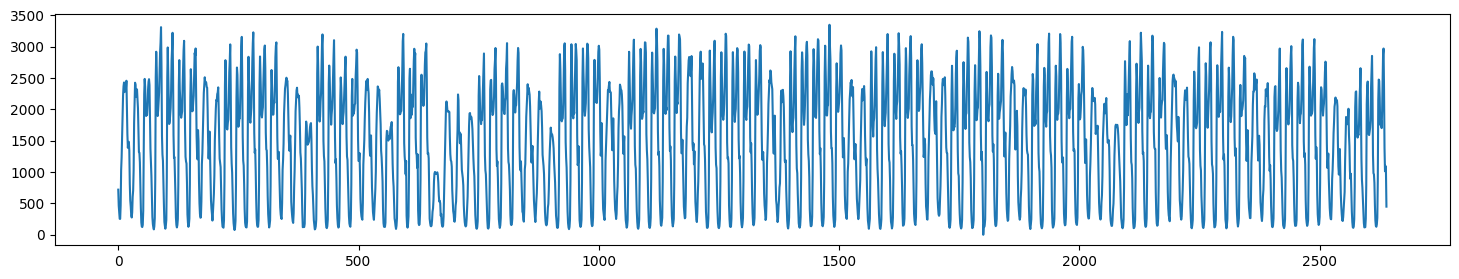

In [ ]:
plt.figure(figsize = (18, 3))
plt.plot(node_features.reshape(65, 26304, 28)[0, -2640:, 0])

## **Create Node Features** (10 features)

In [ ]:
cols = ['datetime', 'temperature_2m', 'precipitation', 'surface_pressure', 'et0_fao_evapotranspiration',
        'vapor_pressure_deficit', 'windspeed_10m', 'windgusts_10m', 'soil_temperature_0_to_7cm', 'station']

In [ ]:
traffic_df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/traffic.csv').set_index('datetime')
weather = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/weather.csv')
weather = weather[cols]
incidents_df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Incidents/incidents.csv').set_index('datetime')

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709760 entries, 0 to 1709759
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   datetime                    object 
 1   temperature_2m              float64
 2   precipitation               float64
 3   surface_pressure            float64
 4   et0_fao_evapotranspiration  float64
 5   vapor_pressure_deficit      float64
 6   windspeed_10m               float64
 7   windgusts_10m               float64
 8   soil_temperature_0_to_7cm   float64
 9   station                     object 
dtypes: float64(8), object(2)
memory usage: 130.4+ MB


In [ ]:
traffic = traffic_df.stack().to_frame().reset_index()
traffic.columns = ['datetime', 'station', 'traffic']
traffic

,datetime,station,traffic
0,2019-07-07 00:00:00,01004,880.000000
1,2019-07-07 00:00:00,02384,590.000000
2,2019-07-07 00:00:00,02413,140.000000
3,2019-07-07 00:00:00,03022,286.000000
4,2019-07-07 00:00:00,100001,771.013889
...,...,...,...
1709755,2022-07-06 23:00:00,9849,129.698148
1709756,2022-07-06 23:00:00,F3FWY001,272.000000
1709757,2022-07-06 23:00:00,T0085,11.293519
1709758,2022-07-06 23:00:00,T0231,153.394907


In [ ]:
incidents = incidents_df.stack().to_frame().reset_index()
incidents.columns = ['datetime', 'station', 'incidents']
incidents['datetime'] = traffic['datetime']
incidents

,datetime,station,incidents
0,2019-07-07 00:00:00,01004,0.0
1,2019-07-07 00:00:00,02384,0.0
2,2019-07-07 00:00:00,02413,0.0
3,2019-07-07 00:00:00,03022,0.0
4,2019-07-07 00:00:00,100001,0.0
...,...,...,...
1709755,2022-07-06 23:00:00,9849,0.0
1709756,2022-07-06 23:00:00,F3FWY001,0.0
1709757,2022-07-06 23:00:00,T0085,0.0
1709758,2022-07-06 23:00:00,T0231,0.0


In [ ]:
node_features = traffic.merge(incidents, on = ['datetime', 'station'], how = 'left').merge(weather, on = ['datetime', 'station'], how = 'left')
node_features.head(5)

,datetime,station,traffic,incidents,temperature_2m,precipitation,surface_pressure,et0_fao_evapotranspiration,vapor_pressure_deficit,windspeed_10m,windgusts_10m,soil_temperature_0_to_7cm
0,2019-07-07 00:00:00,01004,880.000000,0.0,16.4,0.0,1033.0,0.12,0.38,5.0,14.4,15.9
1,2019-07-07 00:00:00,02384,590.000000,0.0,16.2,0.0,1030.1,0.12,0.38,5.0,14.4,15.8
2,2019-07-07 00:00:00,02413,140.000000,0.0,16.2,0.0,1030.4,0.12,0.38,5.0,14.4,15.8
3,2019-07-07 00:00:00,03022,286.000000,0.0,16.1,0.0,1028.2,0.12,0.38,5.0,14.4,15.7
4,2019-07-07 00:00:00,100001,771.013889,0.0,15.5,0.0,1031.5,0.12,0.39,5.5,13.0,14.5


In [ ]:
node_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709760 entries, 0 to 1709759
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   datetime                    object 
 1   station                     object 
 2   traffic                     float64
 3   incidents                   float64
 4   temperature_2m              float64
 5   precipitation               float64
 6   surface_pressure            float64
 7   et0_fao_evapotranspiration  float64
 8   vapor_pressure_deficit      float64
 9   windspeed_10m               float64
 10  windgusts_10m               float64
 11  soil_temperature_0_to_7cm   float64
dtypes: float64(10), object(2)
memory usage: 169.6+ MB


In [ ]:
node_features['datetime'] = pd.to_datetime(node_features['datetime'])
node_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709760 entries, 0 to 1709759
Data columns (total 12 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   datetime                    datetime64[ns]
 1   station                     object        
 2   traffic                     float64       
 3   incidents                   float64       
 4   temperature_2m              float64       
 5   precipitation               float64       
 6   surface_pressure            float64       
 7   et0_fao_evapotranspiration  float64       
 8   vapor_pressure_deficit      float64       
 9   windspeed_10m               float64       
 10  windgusts_10m               float64       
 11  soil_temperature_0_to_7cm   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 169.6+ MB


In [ ]:
node_features.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features_10.csv', index = False)

In [ ]:
X = []

for station in traffic_df.columns:
  timestep = []
  traffic = traffic_df[station]
  new_lst = incidents_df[station]
  weather = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/{}.csv'.format(station)).set_index('datetime')
  weather = weather[cols[1:-1]]
  for i in range(len(traffic)):
    features = []
    features.append(traffic[i])
    features.append(new_lst[i])
    weather_lst = list(weather.iloc[i, :])
    for value in weather_lst:
      features.append(value)
    timestep.append(features)
  X.append(timestep)

In [ ]:
X = np.array(X)
print(X.shape)
print(np.isnan(X).any())

(65, 26304, 10)
False


In [ ]:
X.reshape(-1, 65, 26304).shape

(10, 65, 26304)

In [ ]:
# Change array to 2D
X_reshaped= X.reshape(X.shape[0], -1)

In [ ]:
np.savetxt("/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features_10.txt", X_reshaped)

In [ ]:
node_features = np.loadtxt("/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features.txt")

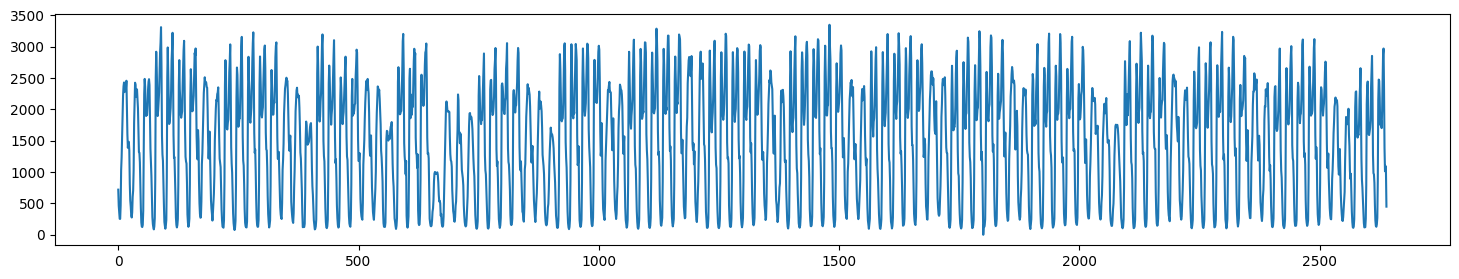

In [ ]:
plt.figure(figsize = (18, 3))
plt.plot(node_features.reshape(65, 26304, 28)[0, -2640:, 0])

## **Create Node Features** (3 features)

In [ ]:
traffic_df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Traffic/traffic.csv').set_index('datetime')
weather = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/weather.csv')
weather = weather[['datetime', 'weathercode', 'station']]
incidents_df = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Incidents/incidents.csv').set_index('datetime')

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709760 entries, 0 to 1709759
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   datetime     object
 1   weathercode  int64 
 2   station      object
dtypes: int64(1), object(2)
memory usage: 39.1+ MB


In [ ]:
traffic = traffic_df.stack().to_frame().reset_index()
traffic.columns = ['datetime', 'station', 'traffic']
traffic

,datetime,station,traffic
0,2019-07-07 00:00:00,01004,880.000000
1,2019-07-07 00:00:00,02384,590.000000
2,2019-07-07 00:00:00,02413,140.000000
3,2019-07-07 00:00:00,03022,286.000000
4,2019-07-07 00:00:00,100001,771.013889
...,...,...,...
1709755,2022-07-06 23:00:00,9849,129.698148
1709756,2022-07-06 23:00:00,F3FWY001,272.000000
1709757,2022-07-06 23:00:00,T0085,11.293519
1709758,2022-07-06 23:00:00,T0231,153.394907


In [ ]:
incidents = incidents_df.stack().to_frame().reset_index()
incidents.columns = ['datetime', 'station', 'incidents']
incidents['datetime'] = traffic['datetime']
incidents

,datetime,station,incidents
0,2019-07-07 00:00:00,01004,0.0
1,2019-07-07 00:00:00,02384,0.0
2,2019-07-07 00:00:00,02413,0.0
3,2019-07-07 00:00:00,03022,0.0
4,2019-07-07 00:00:00,100001,0.0
...,...,...,...
1709755,2022-07-06 23:00:00,9849,0.0
1709756,2022-07-06 23:00:00,F3FWY001,0.0
1709757,2022-07-06 23:00:00,T0085,0.0
1709758,2022-07-06 23:00:00,T0231,0.0


In [ ]:
node_features = traffic.merge(incidents, on = ['datetime', 'station'], how = 'left').merge(weather, on = ['datetime', 'station'], how = 'left')
node_features.head(5)

,datetime,station,traffic,incidents,weathercode
0,2019-07-07 00:00:00,01004,880.000000,0.0,2
1,2019-07-07 00:00:00,02384,590.000000,0.0,2
2,2019-07-07 00:00:00,02413,140.000000,0.0,2
3,2019-07-07 00:00:00,03022,286.000000,0.0,2
4,2019-07-07 00:00:00,100001,771.013889,0.0,2


In [ ]:
node_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709760 entries, 0 to 1709759
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   station      object 
 2   traffic      float64
 3   incidents    float64
 4   weathercode  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 78.3+ MB


In [ ]:
node_features['datetime'] = pd.to_datetime(node_features['datetime'])
node_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709760 entries, 0 to 1709759
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   station      object        
 2   traffic      float64       
 3   incidents    float64       
 4   weathercode  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 78.3+ MB


In [ ]:
node_features.to_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features_3.csv', index = False)

In [ ]:
X = []

for station in traffic_df.columns:
  timestep = []
  traffic = traffic_df[station]
  new_lst = incidents_df[station]
  weather = pd.read_csv('/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/Weather/{}.csv'.format(station)).set_index('datetime')
  weather = weather['weathercode']
  for i in range(len(traffic)):
    features = []
    features.append(traffic[i])
    features.append(new_lst[i])
    features.append(weather[i])
    timestep.append(features)
  X.append(timestep)

In [ ]:
X = np.array(X)
print(X.shape)
print(np.isnan(X).any())

(65, 26304, 3)
False


In [ ]:
X.reshape(-1, 65, 26304).shape

(3, 65, 26304)

In [ ]:
# Change array to 2D
X_reshaped= X.reshape(X.shape[0], -1)

In [ ]:
np.savetxt("/content/drive/MyDrive/Phân tích dữ liệu lớn - DS200.N21/Data/node_features_3.txt", X_reshaped)